# Predicting the movement of air particles by the Lorenz Equation

#### Introduction

For centuries, being able to predict the weather is something that has been of great interest. Within the past decade, considerable achievements have been made in the field allowing for more accurate models of weather (or climate) conditions thus improving the overall ability to predict future forecasts. Being able to accurately model the simplest of systems, such as conduction or convention, must be achieved in order to move on to more complex systems. In 1963, meteorologist, Edward Lorenz, came up with three equations as an attempt to mathematically model the process of convention. This model is dependent on the strength of convective heating along with the vertical and horizontal particle flow at various temperatures. This early model is notable for having chaotic solutions for certain parameters and initial conditions. Without knowing the exact initial condition of a system, predicting an accurate model can be extremely difficult or even impossible. Additional parameters and restrictions must be put in place in order to accurately model a physical system. With this being said, knowing the current state of the weather (or initial values) is just as important as the numerical computer models to process the data. Current weather observations serve as input to the numerical computer models through a process known as data assimilation to produce outputs of temperature, precipitation, and hundreds of other meteorological elements from the oceans to the top of the atmosphere (1). Numerical weather predictions (NWP) have taken these thoughts into consideration as it has advanced over the past decade. This method focuses on taking current observations of weather and processing these data with computer models to forecast the future state of weather (1). While NWP models or “best” understanding of the motions and processes in the atmosphere, they also reflect our limits of knowledge and our inherent tendency to be biased. We are always striving to improve them despite these challenges (2). 

(1)	https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/numerical-weather-prediction#:~:text=Numerical%20Weather%20Prediction%20(NWP)%20data,the%20future%20state%20of%20weather

(2)	http://weather.ou.edu/~scavallo/classes/metr_5004/f2013/lectures/NWP_LecturesFall2013.pdf


#### Description of the Solution Procedure

The Lorenz equations is used to model the movement of air particles between hot and cold atmospheres, this is known as convection. This set of ordinary differential equations (eqs. 1, 2, and 3) is classically known to be a chaotic system due to its dependence on initial conditions. 

\[
  \begin{equation}\tag{1}
  \frac{dx}{dt} =
     \sigma (y-x)
  \end{equation}
\]
\[
  \begin{equation}\tag{2}
  \frac{dy}{dt} =
     x(\rho-z)-y
  \end{equation}
\]
\[
  \begin{equation}\tag{3}
  \frac{dy}{dt} =
     xy-\beta z\
  \end{equation}
\]

Parameters sigma, rho, and beta represent the Prandtl number, Rayleigh number, and the geometric factor respectively. The Prandtl number is the ratio of momentum diffusivity and the thermal diffusivity. The Rayleigh number determines whether the heat transfer is primarily in the form of conduction or convection. The typical values used for these three parameters are <mark>(INSERT TABLE?).</mark>

The most common choice of parameter values are $\sigma = 10, \rho = 28,$
and $\beta=8/3.$

It is important to not that the x, y, and z are not special coordinates. The x variable is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between ascending and descending currents. Similar signs of x and y denote the warm particles rising and cold particles descending. The z variable is proportional to the distortion of the vertical temperature profile with positive values indicating that the strongest gradients occur near the boundaries (1). Equation 4 can be used to determine these conditions with change in time and continuously repeated to capture the true pattern of this system where $\frac{dx}{dt},\frac{dy}{dt},\frac{dz}{dt}$ are evaluated at
$(x_0,y_0,z_0)$.

the
position of the air particle $\Delta t$ seconds later can be determined
by

\[
  \begin{equation}\tag{4}
(x_1,y_1,z_1)=(x_0,y_0,z_0) + 
\left(\frac{dx}{dt},\frac{dy}{dt},\frac{dz}{dt}\right) \Delta t\
  \end{equation}
\]

(1) https://planetmath.org/LorenzEquation



Using python, the following script can be implimented to calculatethe Lorez equations:


    import json                                                             #Import necessary packages to calculate, store, and plot values
    import numpy as np
    from matplotlib import pyplot as plt
    from mpl_toolkits.mplot3d import axes3d
    def derivdx(x, y, sigma):                                               #Define function to calculate dx/dt
        dxdt1 = sigma*(y-x)
        return (dxdt1)
    def derivdy(x, y, z, rho):                                              #Define function to calculate dy/dt
        dydt1 = x*(rho-z)-y
        return (dydt1)
    def derivdz(x, y, z, beta):                                             #Define function to calculate dz/dt
        dzdt1 = x*y - beta*z
        return (dzdt1)
    sigma, rho, beta = 10, 28, 8/3                                          #Parameters are set for sigma, rho, and beta
    deltat = 0.01                                                           #Time step (sec)
    N = 3000                                                                #Number of timesteps
    x = [1]*(N+1)                                                           #Initialize lists and starting values
    y = [1]*(N+1)
    z = [1]*(N+1)
    for i in range(N):
        x[i+1] = x[i] + (derivdx(x[i], y[i], sigma)*deltat)                 #Calculate new x value
        y[i+1] = y[i] + (derivdy(x[i], y[i], z[i], rho)*deltat)             #Calculate new y value
        z[i+1] = z[i] + (derivdz(x[i], y[i], z[i], beta)*deltat)            #Calculate new z value
    xdata = [x]                                                             ## how the heck
    ydata = [y]                                                             #Define lists for ploting and writing purposes
    zdata = [z]




#### Results and Discussion

As previously mentioned, the Lorenz system is a system of ordinary differential equations that is notable for having chaotic solutions for certain parameter values and initial conditions. The system mimics what is known as the “butterfly effect”. The particle that is modeled follows the path similar to the shape of a butterfly's wings and which appears to cross over each other multiple times (figure x and possible movie), however the Uniqueness Theorem states that trajectories cannot cross or merge, hence the two surfaces of can only appear to merge. A "strange attractor" is what is being observed in this sense. In the mathematical field of dynamical systems, an attractor is a set of numerical values toward which a system tends to evolve, for a wide variety of starting conditions of the system. System values that get close enough to the attractor values remain close even if slightly disturbed (cite). Strange attractors fall within this category which are often differentiable in a few directions and are extremely sensitive to small differences in initial conditions (such as those due to rounding errors in numerical computation) which yield widely diverging outcomes for such dynamical systems. Because these systems are highly sensitive to initial conditions, rendering long-term prediction almost impossible in general. When modeling this system, an increase in time steps does not change the over all pattern of the function, but rather keeps re-iterating the same path over and over again.

When analyzing the data one dimensionally, the pattern that appears gives us some in sight as to where the particle is at a certain point in time. Figures (x.1) and (x.2) are comparable in the sense that they both denote when warm particles are rising and when cold particles are descending. The particle is in the warm atmosphere when the values of x and y vs. time are positive and in the cold atmosphere when these values are negative. The particle spends some time in either of these atmospheres before either convention or conduction takes place. These phase transitions are denoted by the sharp change in positive or negative values.

When plotted three dimensionally, the overall plot

Modeling a particle for a considerable amount of time requires the computer to store data 


#### things to mention
* How much data can we realistically compute
    * What t do we need to calculate 4 days
        * 345600 sec = 4 days
        * Can relate this to the last point on how we cant realistically predict this far in advance
* increase of time step doesn’t change the shape but keeps re-iterating pattern
    * particle never crosses over each other
    * starting the program saved points
        * what does this do to the plot in the one dimension
* Three dimensional plots
    * What does the shape tell us
    * Touch on how this tells us what the particle is doing
* One dimensional plot
    * What do the general shapes tell us
    * Touch on how this tells us what the particle is doing
* Super computers working in parallel and how it can help predict things such as rain
    * What does this tell us about predicting the weather up to four days in advanced
    * How I could have made the code better



In [3]:
### FINAL CODE

# Write your script here.
# Mimic your work on other scripts
# Include basic documentation (comments) as illustrated
import json
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
def derivdx(x, y, sigma):
    dxdt1 = sigma*(y-x)
    return (dxdt1)
def derivdy(x, y, z, rho):
    dydt1 = x*(rho-z)-y
    return (dydt1)
def derivdz(x, y, z, beta):
    dzdt1 = x*y - beta*z
    return (dzdt1)
sigma, rho, beta = 10, 28, 8/3 
deltat = 0.01
N = 3000
x = [1]*(N+1)
y = [1]*(N+1)
z = [1]*(N+1)
for i in range(N):
    x[i+1] = x[i] + (derivdx(x[i], y[i], sigma)*deltat)
    y[i+1] = y[i] + (derivdy(x[i], y[i], z[i], rho)*deltat)
    z[i+1] = z[i] + (derivdz(x[i], y[i], z[i], beta)*deltat)
    
xdata = [x]
ydata = [y]
zdata = [z]
#print(dxdt1)
#print (dydt1)
#print(dzdt1)
    



In [25]:
with open("data_file.json", "w") as write_file:
    json.dump(zdata, write_file)

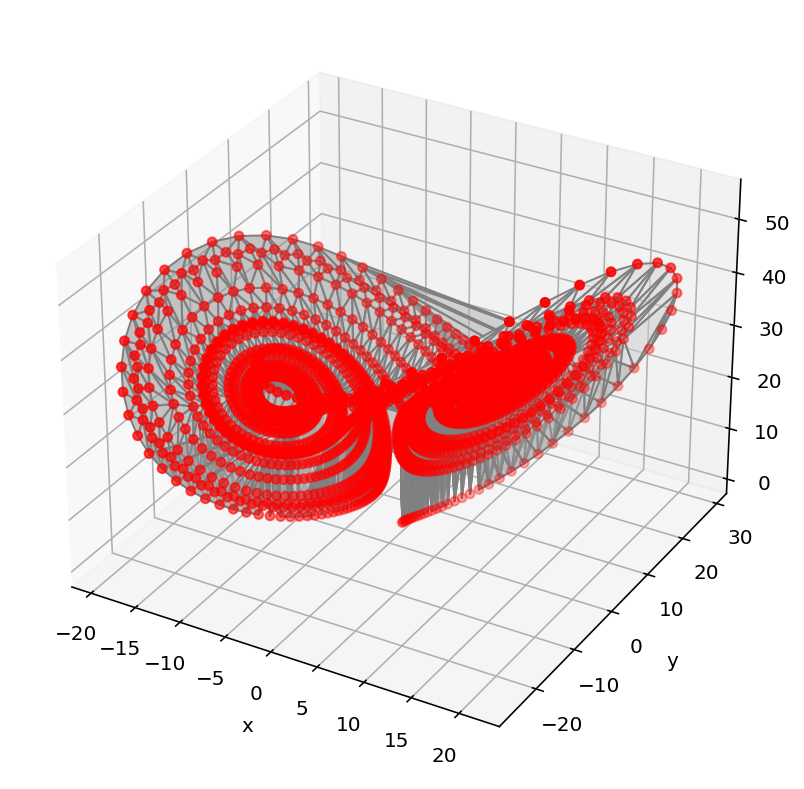

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5)
ax.scatter(x, y, z, c='red')
plt.xlabel(r'x')
plt.ylabel(r'y')
#plt.zlabel(r'z')
plt.show()
#plt.savefig('3DPlot1.svg')

#https://stackoverflow.com/questions/51891538/create-a-surface-plot-of-xyz-altitude-data-in-python

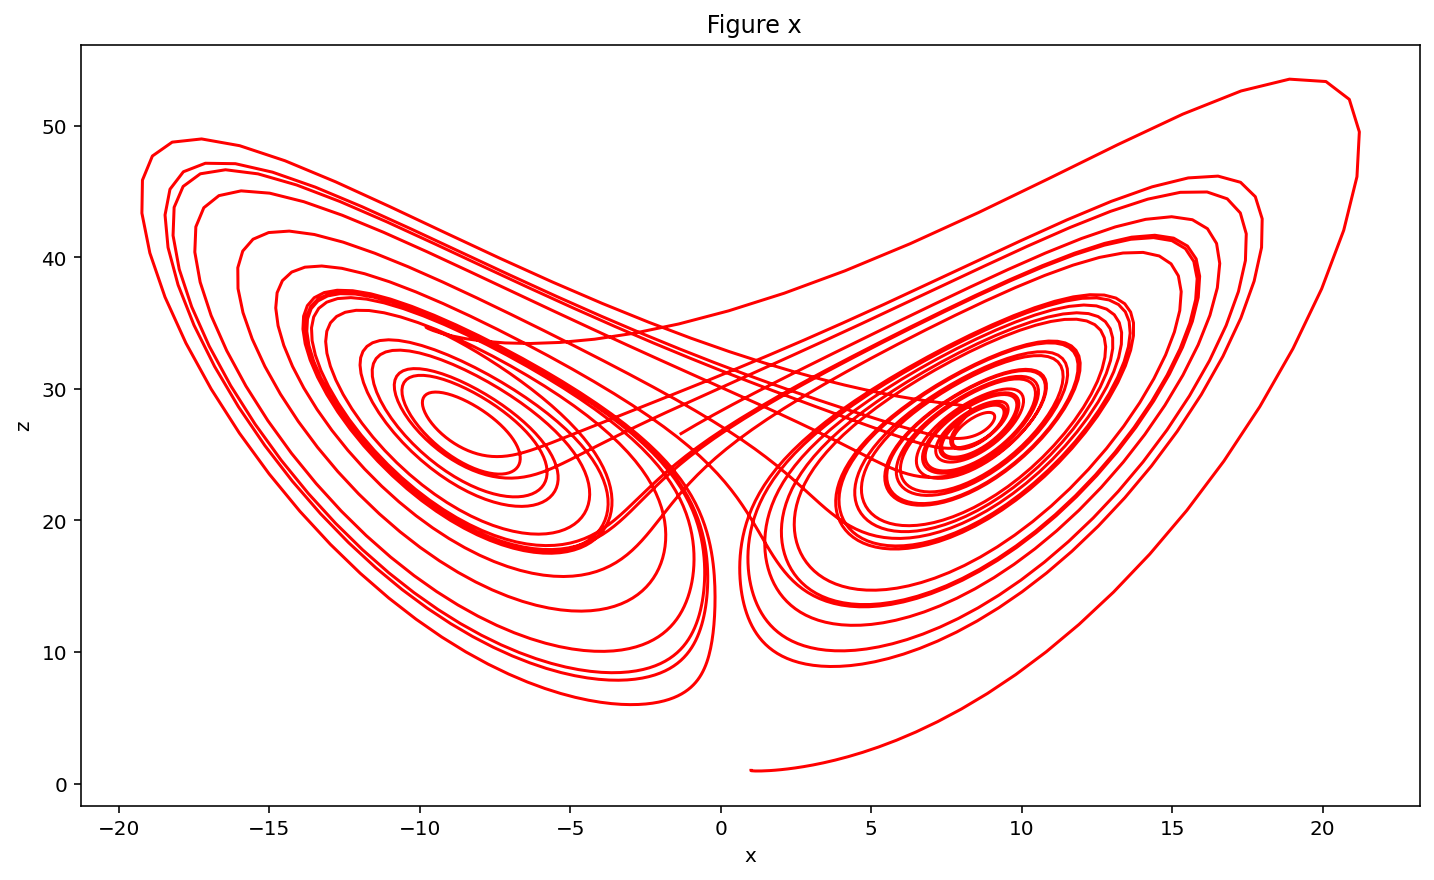

In [21]:
plt.title(r' Figure x')
plt.xlabel(r'x')
plt.ylabel(r'z')
plt.plot(x, z, 'r')


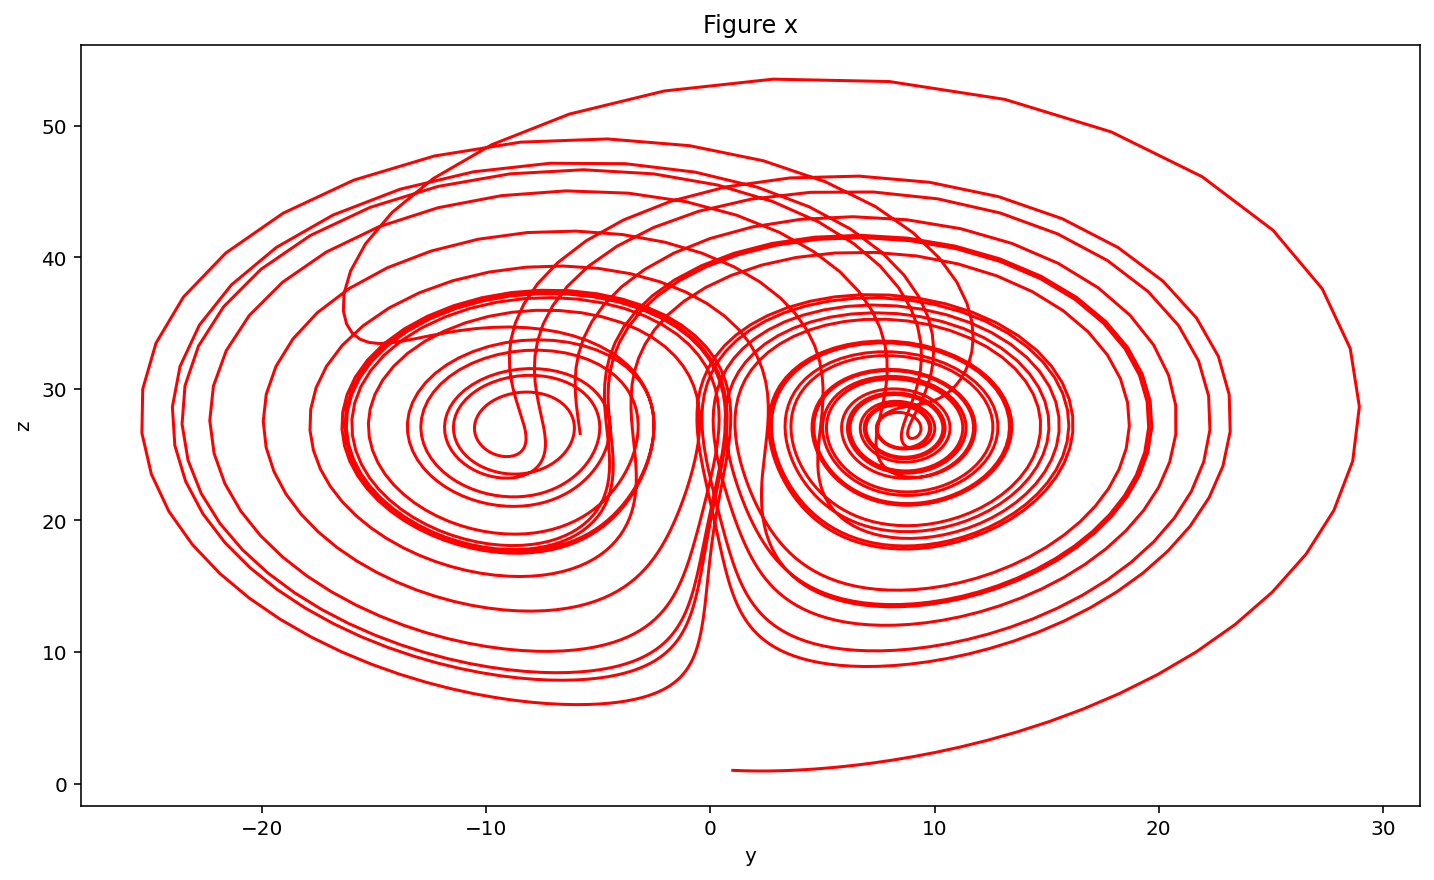

In [22]:
plt.title(r'Figure x')
plt.xlabel(r'y')
plt.ylabel(r'z')
plt.plot(y, z, 'r')

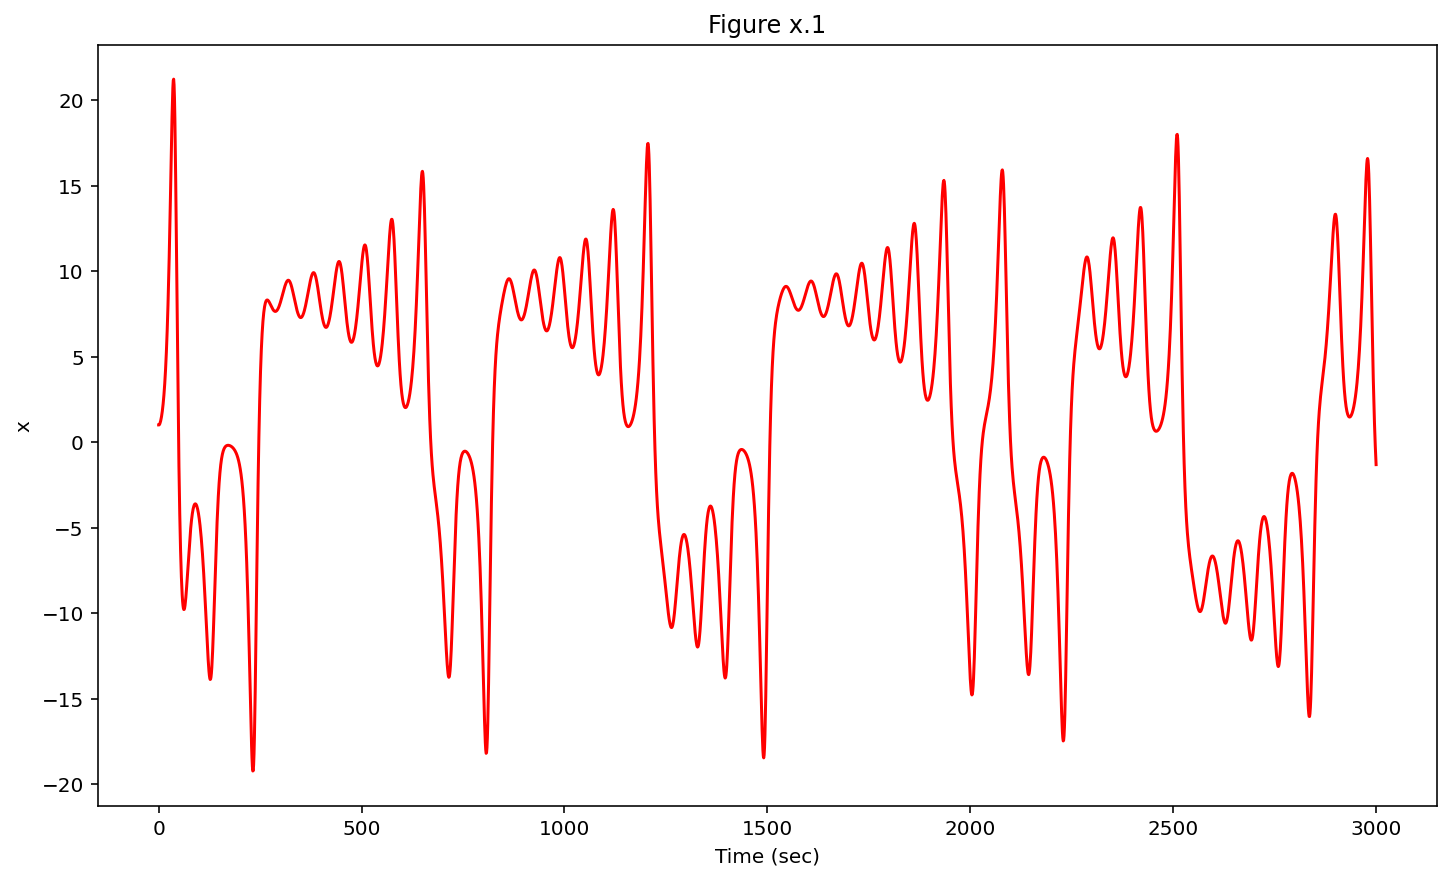

In [30]:
plt.title(r'Figure x.1')
plt.xlabel(r'Time (sec)')
plt.ylabel(r'x')
plt.plot(x, 'r')

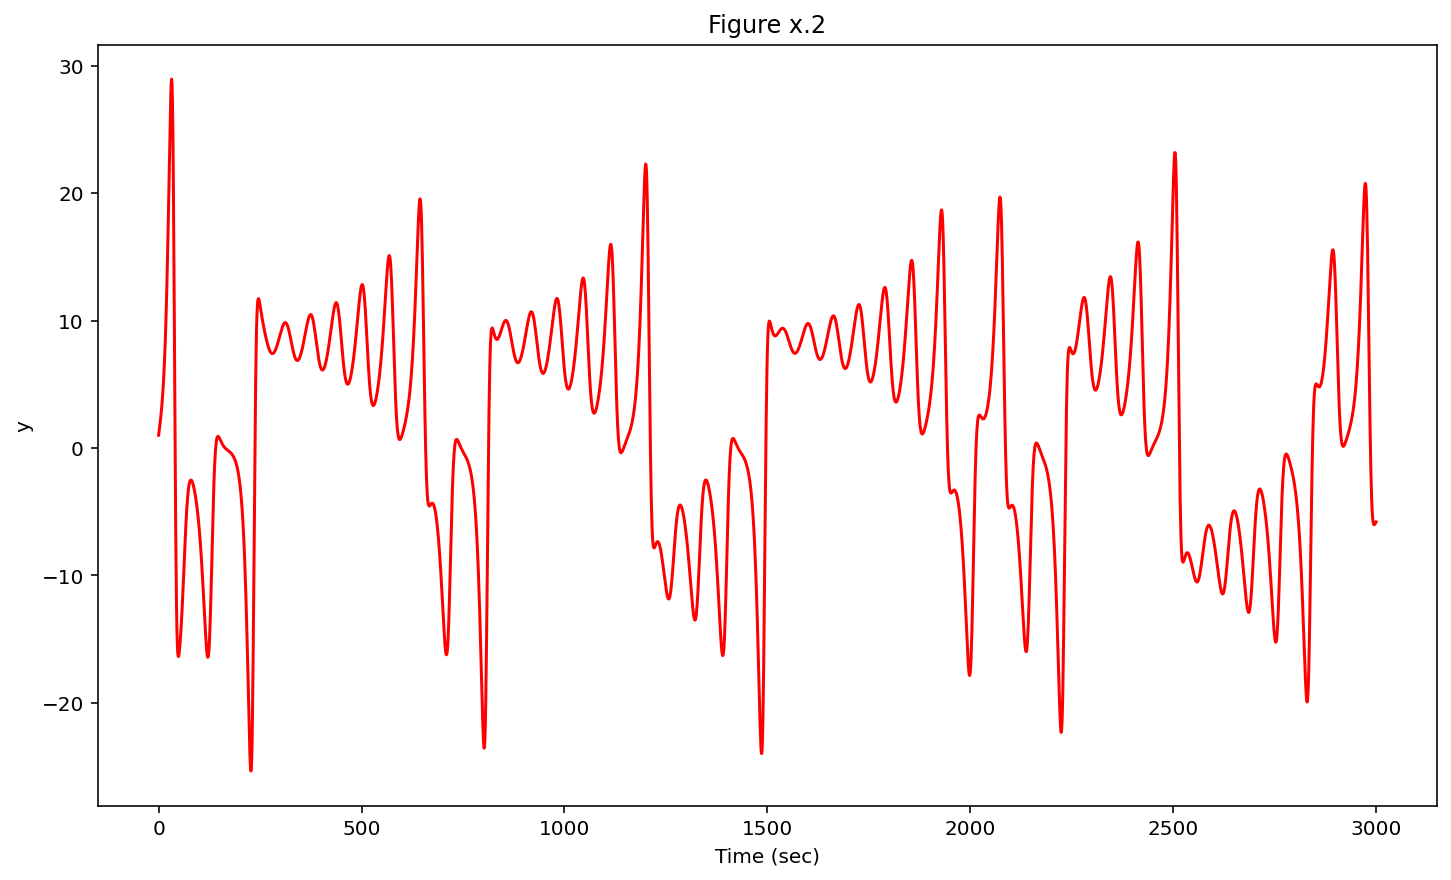

In [29]:
plt.title(r'Figure x.2')
plt.xlabel(r'Time (sec)')
plt.ylabel(r'y')
plt.plot(y, 'r')

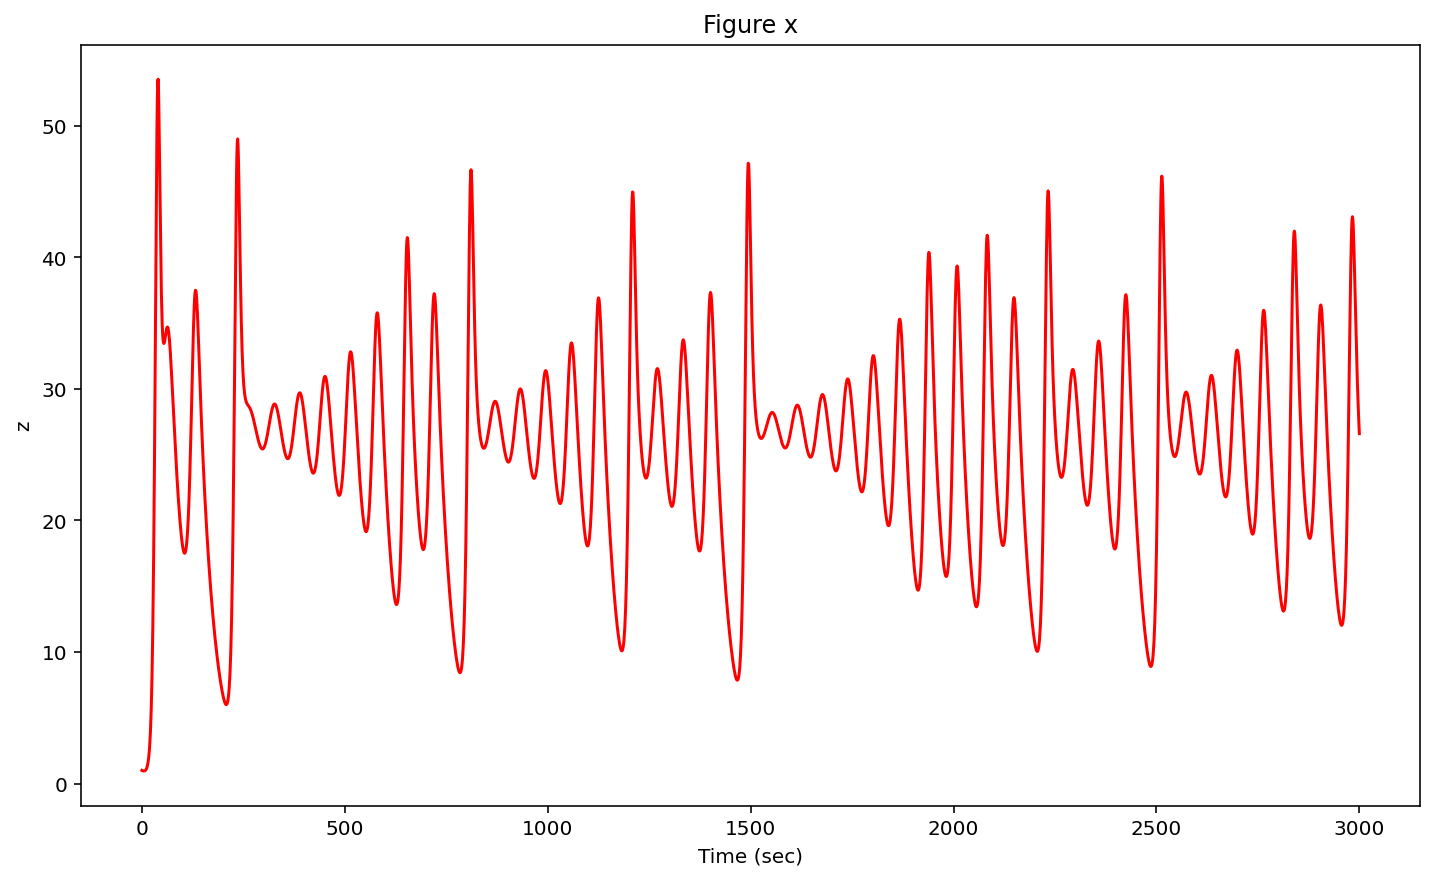

In [26]:
plt.title(r'Figure x')
plt.xlabel(r'Time (sec)')
plt.ylabel(r'z')
plt.plot(z, 'r')